<a href="https://colab.research.google.com/github/AnkitKUpadhyay/mt5-small-multilingual-xlsum/blob/main/mt5-multilingual-xlsum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setting developer environment
!pip install datasets transformers[sentencepiece]

     |████████████████████████████████| 342 kB 5.0 MB/s 
     |████████████████████████████████| 4.2 MB 66.3 MB/s 
     |████████████████████████████████| 1.1 MB 53.7 MB/s 
     |████████████████████████████████| 136 kB 68.0 MB/s 
     |████████████████████████████████| 212 kB 76.2 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 127 kB 69.5 MB/s 
     |████████████████████████████████| 144 kB 74.3 MB/s 
     |████████████████████████████████| 271 kB 54.0 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 596 kB 53.9 MB/s 
     |████████████████████████████████| 6.6 MB 14.8 MB/s 
     |████████████████████████████████| 1.2 MB 42.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling

In [2]:
# installing git-lfs to handle large files and clone
!git lfs install
!git clone https://huggingface.co/datasets/csebuetnlp/xlsum

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
Cloning into 'xlsum'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (342/342), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 342 (delta 52), reused 342 (delta 52), pack-reused 0
Receiving objects: 100% (342/342), 1.25 MiB | 8.11 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Filtering content: 100% (45/45), 1.28 GiB | 69.50 MiB/s, done.


In [3]:
#defining data path to fetch names of languages in the dataset
dummy_data_path='/content/xlsum/dummy'

In [4]:
#converting the names of languages in a dataframe to access it
import pandas as pd
import os
train_data = os.listdir(dummy_data_path)
train_df = pd.DataFrame(train_data)

In [5]:
train_df

,0
0,burmese
1,pidgin
2,gujarati
3,serbian_cyrillic
4,kyrgyz
5,spanish
6,scottish_gaelic
7,russian
8,azerbaijani
9,hausa


In [6]:
# defining a list(name) to store the names of languages in the dataset
name=[]
for i in range(45):
  name.append(train_df[0][i])

In [7]:
name

['burmese',
 'pidgin',
 'gujarati',
 'serbian_cyrillic',
 'kyrgyz',
 'spanish',
 'scottish_gaelic',
 'russian',
 'azerbaijani',
 'hausa',
 'swahili',
 'vietnamese',
 'portuguese',
 'sinhala',
 'french',
 'tamil',
 'turkish',
 'punjabi',
 'nepali',
 'japanese',
 'english',
 'hindi',
 'korean',
 'arabic',
 'oromo',
 'ukrainian',
 'marathi',
 'telugu',
 'tigrinya',
 'uzbek',
 'chinese_simplified',
 'bengali',
 'kirundi',
 'amharic',
 'somali',
 'indonesian',
 'serbian_latin',
 'chinese_traditional',
 'persian',
 'thai',
 'welsh',
 'pashto',
 'urdu',
 'igbo',
 'yoruba']

In [8]:
# loading dataset from huggingface

from datasets import load_dataset
import random

for i in range(45):
  name[i] = load_dataset("csebuetnlp/xlsum", train_df[0][i])
  rand_indices_train = random.sample(range(len(name[i]["train"])), 600)     # randomly selecting 600 elements for each language from train set
  rand_indices_valid=random.sample(range(len(name[i]["validation"])), 200)  # randomly selecting 200 elements for each language from test set
  rand_indices_test=random.sample(range(len(name[i]["test"])), 200)         # randomly selecting 200 elements for each language from validation set
  name[i]["train"] = name[i]["train"].select(rand_indices_train)
  name[i]["validation"] = name[i]["validation"].select(rand_indices_valid)
  name[i]["test"] = name[i]["test"].select(rand_indices_valid)

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/burmese/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/pidgin/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/gujarati/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/serbian_cyrillic/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/kyrgyz/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/spanish/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/scottish_gaelic/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/russian/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/azerbaijani/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/hausa/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/swahili/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/vietnamese/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/portuguese/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/sinhala/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/french/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/tamil/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/turkish/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/punjabi/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/nepali/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/japanese/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/english/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/hindi/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/korean/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/arabic/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/oromo/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/ukrainian/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/marathi/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/telugu/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/tigrinya/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/uzbek/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/chinese_simplified/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/bengali/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/kirundi/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/amharic/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/somali/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/indonesian/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/serbian_latin/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/chinese_traditional/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/persian/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/thai/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/welsh/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/pashto/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/urdu/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/igbo/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/yoruba/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
# checking the content of Dataset Dictionary
name[2]

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 600
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 200
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 200
    })
})

In [10]:
# defining a function to show three samples from train set for any language.
# Only 'text' and 'summary' will be shown because they are needed to train the model.

def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Summary: {example['summary']}'")
        print(f"'>> Text: {example['text']}'")

show_samples(name[0])


'>> Summary: ယူကရိန်းနိုင်ငံ ကီယက်မြို့တော် ပါလီမန်ရှေ့မှာ ဆန္ဒပြသူတွေနဲ့ရဲတွေကြား အဓိကရုန်းဖြစ်လို့ ရဲအရာရှိ တယောက်သေပြီး လူ၁၀၀ ဒဏ်ရာရသွားပါတယ်။'
'>> Text: ယူကရိန်းမြို့တော်ပါလီမန်ရှေ့ဆန္ဒပြပွဲ အငြင်းပွားနေတဲ့ နိုင်ငံအရှေ့ပိုင်းဒေသမှာ ကိုယ်ပိုင် အုပ်ချုပ်ခွင့်ပေးတဲ့ ဥပဒေကြမ်းကို ဆန္ဒပြသူတွေက ကန့်ကွက်နေကြတာ ဖြစ်ပါတယ်။ ဒီဥပဒေကြမ်းကို အမတ်တွေက ပဏာမ အတည်ပြုပြီးနောက် ရာနဲ့ချီတဲ့ ဆန္ဒပြသမားတွေက ပါလီမန်ကို ကာကွယ်နေတဲ့ရဲတွေကို ဗျောက်အိုးတွေ လက်လုပ်ဗုံးတွေနဲ့ တိုက်ခိုက်ခဲ့ပါတယ်။ ရဲတွေက မျက်ရည်ယို ဓါတ်ငွေ့နဲ့ပြန်တိုက်ခဲ့ပါတယ်။ ဒီဥပဒေအရ ရုရှားကို လိုလားတဲ့ သူပုန်တွေ လက်အောက်မှာရှိတဲ့ Donetsk နဲ့ Luhanskဒေသတွေကို လုပ်ပိုင်ခွင့် ပိုပေးမှာ ဖြစ်ပါတယ်။'

'>> Summary: ဗြိတိန် ဝန်ကြီးချုပ် ထရီဆာ မေ ဟာ လာမယ့် ဇွန်လ ၇ ရက်နေ့မှာ ရာထူး ကနေ နုတ်ထွက် ပေးမယ်လို့ မေ လ ၂၄ ရက်နေ့မှာ ကြေညာ ခဲ့ပါတယ်။'
'>> Text: လန်ဒန် မြို့ ဒေါင်းနင်းလမ်း က ဝန်ကြီးချုပ် အိမ်တော်ရှေ့ကနေ နုတ်ထွက်တဲ့ ကြေညာမှု ကို ထရီဇာ မေ စိတ်ထိခိုက် လှုပ်ရှားမှု အပြည့်နဲ့ ပြောဆို သွားခဲ့တာပါ။ ဒါပေမယ့် သူ့ အနေနဲ့ ဗြိတိန် အကျိုးစီးပွား အတွက် အကောင်း 

In [11]:
# concatenating datasets for every language into one language_dataset based on same split as was in the original dataset i.e.
# train, test and validation

from datasets import concatenate_datasets, DatasetDict

language_dataset = DatasetDict()

for split in name[0].keys():
    language_dataset[split] = concatenate_datasets(
        [name[0][split], name[1][split], name[2][split], name[3][split], name[4][split], name[5][split], name[6][split], name[7][split], name[8][split], 
         name[9][split], name[10][split], name[11][split], name[12][split], name[13][split], name[14][split], name[15][split], name[16][split], name[17][split], 
         name[18][split], name[19][split], name[20][split], name[21][split], name[22][split], name[23][split], name[24][split], name[25][split], name[26][split], 
         name[27][split], name[28][split], name[29][split], name[30][split], name[31][split], name[32][split], name[33][split], name[34][split], name[35][split], 
         name[36][split], name[37][split], name[38][split], name[39][split], name[40][split], name[41][split], name[42][split], name[43][split], name[44][split], ], 
    )
    language_dataset[split] = language_dataset[split].shuffle(seed=42)

# Peek at a few examples
show_samples(language_dataset)


'>> Summary: Waxaa isa soo taraya xiisada siyaasadeed ee ka taagan dalka Kenya tan iyo markii hoggaamiyaha mucaaradka Raila Odinga uu iskiis isugu dhaariyay in uu yahay madaxweynaha shacabka 30-kii bishii Janaayo.'
'>> Text: Miguna Miguna (Bidix) Raila Odinga (Dhexda) Tom Kajwang (Midig) Inkasta oo dowladda Kenya ay illaa hadda muujisay is xakamayn badan iyo taxadar, haddane waxa ay u egtahay in ay qaadayso talaabooyin is xigxiga oo istaraatiijiyadaysan. Mid mid ayaan isu dul taagaynaa waxyaabihii dhacay tan iyo maalintaas, iyo waxyaabihii ugu dambeeyay ee dhacay. 30-kii Janaayo Taageerayaal kor u haya kitaabka masiixiyiinta dhaartii Raila Waxa ay ahayd maalin taariikhda Kenya ka gashay baal mugdi ah ama baal dahab ah hadba dhinaca qofka aragtidiisa ay jirto iyo cidda uu taageersanyahay. Waxa ay maalinta ku bilaabatay iyada oo ciidammada rabshadaha ka hor taga iyo booliiska ay isku gadaameen beerta Uhuru Park oo ay mucaaradka qorsheynayeen in ay ku qabtaan xafladda dhaarinta. Balse mu

In [12]:
# displaying the content of language_dataset
language_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 27000
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 9000
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 9000
    })
})

In [13]:
#  declaring model_checkpoint and importing AutoTokenizer for it.

from transformers import AutoTokenizer

model_checkpoint = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/553 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/convert_slow_tokenizer.py:435: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"


In [14]:
# defining variables to check length of tokenized text and summary columns for each data element

text_len=[len(tokenizer.encode(s)) for s in language_dataset["train"]["text"]]
summary_len=[len(tokenizer.encode(s)) for s in language_dataset["train"]["summary"]]

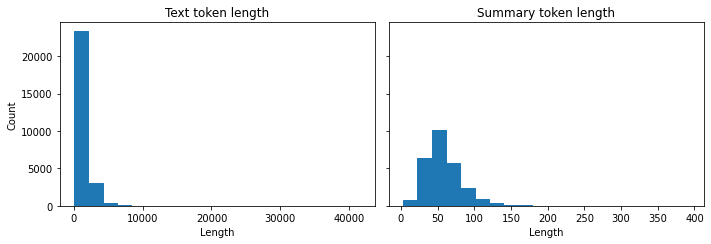

In [16]:
# displaying plot to show the length of tokens in text and summary to be given as input to our model arguments

import matplotlib.pyplot as plt
fig, axes=plt.subplots(1,2, figsize=(10, 3.5), sharey=True)
axes[0].hist(text_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Text token length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(summary_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary token length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [17]:
# giving a sample input to tokenizer and get it converted into id

inputs = tokenizer("Bacow was the Hauser Leader-in-Residence at the Harvard Kennedy School of Government’s Center for Public Leadership and served as a member of the Harvard Corporation, the university’s principal governing board. One of the most widely experienced leaders in American higher education, known for his commitment to expanding student opportunity, catalyzing academic innovation, and encouraging universities’ civic engagement and service to society, Bacow is the former President of Tufts University and past Chancellor and Chair of the Faculty at the Massachusetts Institute of Technology. As President of Tufts from 2001 to 2011, Bacow advanced the university’s commitment to excellence in teaching, research, and public service and fostered collaboration across the university’s eight schools. Under his leadership, Tufts pursued initiatives to enhance the undergraduate experience, deepen graduate and professional education and research in critical fields, broaden international engagement, and promote active citizenship among members of the university community.")

inputs

{'input_ids': [2215, 108509, 639, 287, 10264, 295, 67388, 264, 348, 264, 228056, 344, 287, 259, 81400, 72346, 5736, 304, 21090, 293, 263, 4977, 332, 7305, 259, 89783, 305, 259, 42816, 527, 259, 262, 11912, 304, 287, 259, 81400, 21218, 261, 287, 49951, 293, 263, 6017, 16780, 347, 26383, 260, 2953, 304, 287, 2250, 17000, 484, 4842, 285, 54743, 281, 6369, 259, 10954, 19113, 261, 259, 15965, 332, 1638, 317, 83459, 288, 21982, 347, 8590, 259, 27896, 261, 98172, 276, 39777, 259, 44353, 69295, 261, 305, 259, 146591, 347, 259, 119486, 293, 99912, 297, 259, 44660, 305, 2945, 288, 259, 39512, 261, 2215, 108509, 339, 287, 259, 18004, 13976, 304, 168627, 270, 263, 3934, 305, 9002, 43010, 93135, 305, 30462, 304, 287, 259, 43590, 276, 344, 287, 82117, 16927, 304, 11947, 260, 1477, 13976, 304, 168627, 270, 263, 702, 6003, 288, 981, 261, 2215, 108509, 259, 39260, 287, 49951, 293, 263, 317, 83459, 288, 259, 126290, 281, 259, 45037, 261, 8348, 261, 305, 2821, 2945, 305, 259, 201135, 345, 259, 66463, 259

In [18]:
# converting ids back to tokens
tokenizer.convert_ids_to_tokens(inputs.input_ids)

['▁Ba',
 'cow',
 '▁was',
 '▁the',
 '▁Haus',
 'er',
 '▁Leader',
 '-',
 'in',
 '-',
 'Residence',
 '▁at',
 '▁the',
 '▁',
 'Harvard',
 '▁Kennedy',
 '▁School',
 '▁of',
 '▁Government',
 '’',
 's',
 '▁Center',
 '▁for',
 '▁Public',
 '▁',
 'Leadership',
 '▁and',
 '▁',
 'served',
 '▁as',
 '▁',
 'a',
 '▁member',
 '▁of',
 '▁the',
 '▁',
 'Harvard',
 '▁Corporation',
 ',',
 '▁the',
 '▁university',
 '’',
 's',
 '▁principal',
 '▁govern',
 'ing',
 '▁board',
 '.',
 '▁One',
 '▁of',
 '▁the',
 '▁most',
 '▁wide',
 'ly',
 '▁experience',
 'd',
 '▁leaders',
 '▁in',
 '▁American',
 '▁',
 'higher',
 '▁education',
 ',',
 '▁',
 'known',
 '▁for',
 '▁his',
 '▁c',
 'ommitment',
 '▁to',
 '▁expand',
 'ing',
 '▁student',
 '▁',
 'opportunity',
 ',',
 '▁catal',
 'y',
 'zing',
 '▁',
 'academic',
 '▁innovation',
 ',',
 '▁and',
 '▁',
 'encourag',
 'ing',
 '▁',
 'universities',
 '’',
 '▁civi',
 'c',
 '▁',
 'engagement',
 '▁and',
 '▁service',
 '▁to',
 '▁',
 'society',
 ',',
 '▁Ba',
 'cow',
 '▁is',
 '▁the',
 '▁',
 'former',
 '▁P

In [19]:
# based on the plot of text length and summary length, max_input_length and max_target_length is declared

max_input_length = 2048
max_target_length = 128

# a preprocess function is defined that will process each input from the dataset into required length and tokenize it

def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["text"], max_length=max_input_length, truncation=True
    )
    # Set up the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples["summary"], max_length=max_target_length, truncation=True
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [20]:
# declaring a tokenized_dataset to store conversion of language_dataset into tokenized dataset.
tokenized_datasets = language_dataset.map(preprocess_function, batched=True)

  0%|          | 0/27 [00:00<?, ?ba/s]

  0%|          | 0/9 [00:00<?, ?ba/s]

  0%|          | 0/9 [00:00<?, ?ba/s]

In [21]:
# install dependencies for defining rouge score
!pip install rouge_score

In [22]:
# loading metrics

from datasets import load_metric

rouge_score = load_metric("rouge")

In [23]:
# smaple input to see working of rouge score

generated_summary = "I absolutely loved reading the Hunger Games"
reference_summary = "I loved reading the Hunger Games"

In [24]:
# checking rouge score on a sample input to the function

scores = rouge_score.compute(
    predictions=[generated_summary], references=[reference_summary]
)
scores

{'rouge1': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), high=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)),
 'rouge2': AggregateScore(low=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272), mid=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272), high=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272)),
 'rougeL': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), high=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)),
 'rougeLsum': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.92307692307

In [25]:
scores["rouge1"].mid

Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)

In [26]:
# installing natural language toolkit to access punctuation symbols in sentences
!pip install nltk

In [27]:
import nltk

# installing punkt to access punctuation symbols
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
from nltk.tokenize import sent_tokenize

# defining a strong baseline for summarization model
def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])


print(three_sentence_summary(language_dataset["train"][2]["text"]))

Танқид Human Rights Watch халқаро инсон ҳуқуқларини ҳимоя қилиш ташкилоти Ўзбекистоннинг янги таҳрирдаги Жиноят кодекси лойиҳасини танқид қилиб чиққан.
Ташкилотнинг маълум қилишича, лойиҳа жузъий ижобий ўзгаришларни таклиф қилсада, унда сўз эркинлиги, йиғилишлар ва диний ҳуқуқларни поймол этувчи бандлар сақланиб қолинган.
HRW Кодекс лойиҳасидаги 282-модда (Жамоат бирлашмалари ёки диний ташкилотларни қонунга хилоф равишда тузиш) ва 284-модда (Йиғилишлар, митинглар, кўча юришлари ёки намойишлар уюштириш, ўтказиш тартибини бузиш)га эътибор қаратган.


In [29]:
# defining an evaluate_baseline function with dataset and metric as parameters

def evaluate_baseline(dataset, metric):
    summaries = [three_sentence_summary(text) for text in dataset["text"]]
    return metric.compute(predictions=summaries, references=dataset["summary"])

In [30]:
# evaluating baseline on validation set

import pandas as pd

score = evaluate_baseline(language_dataset["validation"], rouge_score)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
rouge_dict

{'rouge1': 11.67, 'rouge2': 2.97, 'rougeL': 8.37, 'rougeLsum': 9.48}

In [31]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [33]:
# configuring git

!git config --global user.email "ankitkupadhyay1202@gmail.com"
!git config --global user.name "AnkitKUpadhyay"

In [34]:
# logging in to huggingface hub

from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [35]:
# defining and declaring arguments for training the model

from transformers import Seq2SeqTrainingArguments

batch_size = 2
num_train_epochs = 5
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned-multilingual-xlsum-new",  # declaring name of the model
    evaluation_strategy="epoch",                                  # defining epoch as evaluation strategy
    learning_rate=5.6e-5,                                         # learning rate of the model
    per_device_train_batch_size=batch_size,                       # training batch size
    per_device_eval_batch_size=batch_size,                        # evaluation batch size
    weight_decay=0.01,                                          
    save_total_limit=3,
    num_train_epochs=num_train_epochs,                            # number of epochs during training
    predict_with_generate=True,
    logging_steps=10,                                             # number of logging steps
    gradient_accumulation_steps=8,                                # gradient accumulation step to train model by aggregating gradients on small batches and optimizing it
    push_to_hub=True,                                             # push to hub set to true to upload model on the huggingface hub
)

In [36]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = rouge_score.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    # Extract the median scores
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}

In [37]:
# defining data collator to pad input and labels
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [38]:
# removing column names from train set

tokenized_datasets = tokenized_datasets.remove_columns(
    language_dataset["train"].column_names
)

In [39]:
# calling data_collator on train set to pad inputs and labels
features = [tokenized_datasets["train"][i] for i in range(2)]
data_collator(features)

{'input_ids': tensor([[ 1177,  3691,  1295,  ...,     0,     0,     0],
        [  259, 83093,  7109,  ...,   260,   271,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([[  3923,  31655,   5322,    775,   2239,   7499,   1177,   3691,    973,
          36388,  20811,   2557,  62487,    775,  10783,   6554,    259,  10557,
            973,    259,  29817,    406,   1189,  54909,   1697,    775,   3207,
            991,    259, 152434,    259,   6716,   3366,   1457,  27914,  75365,
            572,  14000, 177491,  40365,   3292,  16270,   1295,  16667,   3643,
          10286,   1539,   6918,   1295,    259,  30507,  13358,   9399,   1505,
            259,  64928,  48445,   3207,   4159,   1062,   4033,  15267,    406,
           9533,  76381,   4253,  25204,   4006,      1],
        [  4974,  11831,  12053,  75477, 154298,    259,  25484,  56241,   7109,
          69411,   7986,  64580,   5259,    259,  34940,   2493,

In [40]:
# defining a trainer with required paramters 

from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/ankitkupadhyay/mt5-small-finetuned-multilingual-xlsum-new into local empty directory.


In [41]:
#empty cache in CUDA

import torch
torch.cuda.empty_cache()

In [42]:
# calling the trainer to run for 5 epochs
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 27000
  Num Epochs = 5
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 8
  Total optimization steps = 8435


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
0,3.968400,2.890199,8.053100,1.835700,6.723400,6.740100
1,3.620000,2.848596,8.488100,2.017800,7.054200,7.085400
2,3.376500,2.798593,8.779600,2.234200,7.336300,7.364500
3,3.504300,2.767720,9.048600,2.309900,7.549300,7.568500
4,3.338000,2.767899,9.199300,2.341600,7.668400,7.707400


Saving model checkpoint to mt5-small-finetuned-multilingual-xlsum-new/checkpoint-500
Configuration saved in mt5-small-finetuned-multilingual-xlsum-new/checkpoint-500/config.json
Model weights saved in mt5-small-finetuned-multilingual-xlsum-new/checkpoint-500/pytorch_model.bin
tokenizer config file saved in mt5-small-finetuned-multilingual-xlsum-new/checkpoint-500/tokenizer_config.json
Special tokens file saved in mt5-small-finetuned-multilingual-xlsum-new/checkpoint-500/special_tokens_map.json
Copy vocab file to mt5-small-finetuned-multilingual-xlsum-new/checkpoint-500/spiece.model
tokenizer config file saved in mt5-small-finetuned-multilingual-xlsum-new/tokenizer_config.json
Special tokens file saved in mt5-small-finetuned-multilingual-xlsum-new/special_tokens_map.json
Copy vocab file to mt5-small-finetuned-multilingual-xlsum-new/spiece.model
Adding files tracked by Git LFS: ['tokenizer.json']. This may take a bit of time if the files are large.
Saving model checkpoint to mt5-small-fi

TrainOutput(global_step=8435, training_loss=3.749289539882115, metrics={'train_runtime': 35324.4667, 'train_samples_per_second': 3.822, 'train_steps_per_second': 0.239, 'total_flos': 1.840432680873984e+17, 'train_loss': 3.749289539882115, 'epoch': 5.0})

In [43]:
# pushing trainer to hub with a commit message and given tag as parameter
trainer.push_to_hub(commit_message="Training complete", tags="multilingual model")

Saving model checkpoint to mt5-small-finetuned-multilingual-xlsum-new
Configuration saved in mt5-small-finetuned-multilingual-xlsum-new/config.json
Model weights saved in mt5-small-finetuned-multilingual-xlsum-new/pytorch_model.bin
tokenizer config file saved in mt5-small-finetuned-multilingual-xlsum-new/tokenizer_config.json
Special tokens file saved in mt5-small-finetuned-multilingual-xlsum-new/special_tokens_map.json
Copy vocab file to mt5-small-finetuned-multilingual-xlsum-new/spiece.model
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.33k/1.12G [00:00<?, ?B/s]

Upload file runs/May17_14-52-25_c212145f3044/events.out.tfevents.1652799224.c212145f3044.73.0:   2%|2         …

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/ankitkupadhyay/mt5-small-finetuned-multilingual-xlsum-new
   ae8a2d5..aaa605c  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Sequence-to-sequence Language Modeling', 'type': 'text2text-generation'}, 'metrics': [{'name': 'Rouge1', 'type': 'rouge', 'value': 9.1993}]}
remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/ankitkupadhyay/mt5-small-finetuned-multilingual-xlsum-new
   aaa605c..0d78bda  main -> main



'https://huggingface.co/ankitkupadhyay/mt5-small-finetuned-multilingual-xlsum-new/commit/aaa605c7ff92afc0090feb6f5bb717789cbc2f0c'